In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('../Code')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'match_data3.csv'

In [12]:
df.columns

Index(['match_id', 'player_id', 'player_name', 'runs_scored', 'balls_faced',
       'no_of_fours', 'no_of_sixes', 'no_of_catches', 'runouts',
       'balls_bowled', 'dot_balls', 'wickets', 'runs_conceded', 'stumpings',
       'out', 'date', 'venue', 'match_type', 'gender'],
      dtype='object')

In [20]:
first_column_name = df.columns[0]

# Get the dtype of the first column
print(f"First column name: {first_column_name}")
print(f"Dtype of the first column: {df[first_column_name].dtype}")

First column name: match_id
Dtype of the first column: object


In [10]:
df_h2h = pd.read_csv('batsman_vs_bowler_data.csv')
df_h2h.head()

,batsman_id,batsman_name,bowler_id,bowler_name,runs,balls,4s,6s,wicket,extras,match_id,gender,fielder_name,fielder_id,fielding_type,venue,date,match_type


# career - odi

In [30]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for a given player before a specified date
def get_player_statistics(match_date, player_id, player_name):
    # Filter the dataset for the player and matches before the given date
    player_data = df[(df['player_id'] == player_id) & (df['player_name'] == player_name) & (df['date'] < match_date)]

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / matches_for_average if matches_for_average > 0 else 0
        stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()
        stats['batsman']['100s'] = (player_data['runs_scored'] >= 100).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "8a75e999"  # Example player ID
player_name = "Babar Azam"  # Example player name

player_stats = get_player_statistics(match_date, player_id, player_name)
print(player_stats)


{'player_name': 'Babar Azam', 'player_id': '8a75e999', 'batsman': {'average_runs_per_match': 51.73312883435583, 'strike_rate': 88.99736147757255, 'total_runs': 16865, '50s': 150, '100s': 40}, 'bowler': {'economy_rate': 2.8, 'wickets': 2, 'average': 21.0}, 'fielder': {'total_catches': 187, 'total_runouts': 10}}


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\4031943691.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


# career - t20

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for a given player before a specified date
def get_player_statistics(match_date, player_id, player_name):
    # Filter the dataset for the player and matches before the given date
    player_data = df[(df['player_id'] == player_id) & (df['player_name'] == player_name) & (df['date'] < match_date)]

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / matches_for_average if matches_for_average > 0 else 0
        stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['30s'] = (player_data['runs_scored'] >= 30).sum()
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "2f49c897"  # Example player ID
player_name = "Mohammed Siraj"  # Example player name

player_stats = get_player_statistics(match_date, player_id, player_name)
print(player_stats)


# career - test

In [27]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for a given player before a specified date
def get_player_statistics(match_date, player_id, player_name):
    # Filter the dataset for the player and matches before the given date
    player_data = df[(df['player_id'] == player_id) & (df['player_name'] == player_name) & (df['date'] < match_date)]

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / (2*matches_for_average) if matches_for_average > 0 else 0
        # stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()
        stats['batsman']['100s'] = (player_data['runs_scored'] >= 100).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        # stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "2f49c897"  # Example player ID
player_name = "Mohammed Siraj"  # Example player name

player_stats = get_player_statistics(match_date, player_id, player_name)
print(player_stats)


{'player_name': 'Mohammed Siraj', 'player_id': '2f49c897', 'batsman': {'average_runs_per_match': 3.8970588235294117, 'total_runs': 265, '50s': 0, '100s': 0}, 'bowler': {'wickets': 261, 'average': 25.471264367816094}, 'fielder': {'total_catches': 48, 'total_runouts': 5}}


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\2819026782.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


# recent form - odi

In [70]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for the last 5 matches before a given date
def get_player_statistics_last_5_matches(match_date, player_id, player_name):
    # Filter the dataset for the player and matches before the given date
    player_data = df[(df['player_id'] == player_id) & (df['player_name'] == player_name) & (df['date'] < match_date)]

    # Sort matches by date in descending order and select the last 5 matches
    player_data = player_data.sort_values(by='date', ascending=False).head(5)

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / matches_for_average if matches_for_average > 0 else 0
        stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()
        stats['batsman']['100s'] = (player_data['runs_scored'] >= 100).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "740742ef"  # Example player ID
player_name = "RG Sharma"  # Example player name

player_stats_last_5 = get_player_statistics_last_5_matches(match_date, player_id, player_name)
print(player_stats_last_5)


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\898859690.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


{'player_name': 'RG Sharma', 'player_id': '740742ef', 'batsman': {'average_runs_per_match': 39.8, 'strike_rate': 142.14285714285714, 'total_runs': 199, '50s': 1, '100s': 0}, 'bowler': {'economy_rate': 8.4, 'wickets': 1, 'average': 7.0}, 'fielder': {'total_catches': 1, 'total_runouts': 0}}


# recent form - t20

In [35]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for the last 5 matches before a given date
def get_player_statistics_last_5_matches(match_date, player_id, player_name):
    # Filter the dataset for the player and matches before the given date
    player_data = df[(df['player_id'] == player_id) & (df['player_name'] == player_name) & (df['date'] < match_date)]

    # Sort matches by date in descending order and select the last 5 matches
    player_data = player_data.sort_values(by='date', ascending=False).head(5)

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / matches_for_average if matches_for_average > 0 else 0
        stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['30'] = (player_data['runs_scored'] >= 30).sum()
        stats['batsman']['50'] = (player_data['runs_scored'] >= 50).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "740742ef"  # Example player ID
player_name = "RG Sharma"  # Example player name

player_stats_last_5 = get_player_statistics_last_5_matches(match_date, player_id, player_name)
print(player_stats_last_5)


{'player_name': 'RG Sharma', 'player_id': '740742ef', 'batsman': {'average_runs_per_match': 39.8, 'strike_rate': 142.14285714285714, 'total_runs': 199, '30': 4, '50': 1}, 'bowler': {'economy_rate': 8.4, 'wickets': 1, 'average': 7.0}, 'fielder': {'total_catches': 1, 'total_runouts': 0}}


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\3852153949.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


# recent form - test 

In [36]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for the last 5 matches before a given date
def get_player_statistics_last_5_matches(match_date, player_id, player_name):
    # Filter the dataset for the player and matches before the given date
    player_data = df[(df['player_id'] == player_id) & (df['player_name'] == player_name) & (df['date'] < match_date)]

    # Sort matches by date in descending order and select the last 5 matches
    player_data = player_data.sort_values(by='date', ascending=False).head(5)

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / (2* matches_for_average) if matches_for_average > 0 else 0
        # stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()
        stats['batsman']['100s'] = (player_data['runs_scored'] >= 100).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        # stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "740742ef"  # Example player ID
player_name = "RG Sharma"  # Example player name

player_stats_last_5 = get_player_statistics_last_5_matches(match_date, player_id, player_name)
print(player_stats_last_5)


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\3172608357.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


{'player_name': 'RG Sharma', 'player_id': '740742ef', 'batsman': {'average_runs_per_match': 19.9, 'total_runs': 199, '50s': 1, '100s': 0}, 'bowler': {'wickets': 1, 'average': 7.0}, 'fielder': {'total_catches': 1, 'total_runouts': 0}}


# venue - odi 

In [37]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for a given player before a specified date at a specific venue
def get_player_statistics_at_venue(match_date, player_id, player_name, venue):
    # Filter the dataset for the player, matches before the given date, and the specified venue
    player_data = df[(df['player_id'] == player_id) &
                     (df['player_name'] == player_name) &
                     (df['date'] < match_date) &
                     (df['venue'] == venue)]

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "venue": venue,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / matches_for_average if matches_for_average > 0 else 0
        stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()
        stats['batsman']['100s'] = (player_data['runs_scored'] >= 100).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "d2c2b2d5"  # Example player ID
player_name = "SR Tendulkar"  # Example player name
venue = "Wankhede Stadium"  # Example venue

player_stats_venue = get_player_statistics_at_venue(match_date, player_id, player_name, venue)
print(player_stats_venue)


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\3032914085.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


{'player_name': 'SR Tendulkar', 'player_id': 'd2c2b2d5', 'venue': 'Wankhede Stadium', 'batsman': {'average_runs_per_match': 35.93103448275862, 'strike_rate': 92.62222222222222, 'total_runs': 1042, '50s': 7, '100s': 1}, 'bowler': {'economy_rate': 4.454545454545454, 'wickets': 0, 'average': 0}, 'fielder': {'total_catches': 13, 'total_runouts': 0}}


# venue - t20

In [38]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for a given player before a specified date at a specific venue
def get_player_statistics_at_venue(match_date, player_id, player_name, venue):
    # Filter the dataset for the player, matches before the given date, and the specified venue
    player_data = df[(df['player_id'] == player_id) &
                     (df['player_name'] == player_name) &
                     (df['date'] < match_date) &
                     (df['venue'] == venue)]

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "venue": venue,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs / matches_for_average if matches_for_average > 0 else 0
        stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['30s'] = (player_data['runs_scored'] >= 30).sum()
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "d2c2b2d5"  # Example player ID
player_name = "SR Tendulkar"  # Example player name
venue = "Wankhede Stadium"  # Example venue

player_stats_venue = get_player_statistics_at_venue(match_date, player_id, player_name, venue)
print(player_stats_venue)


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\123597510.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


{'player_name': 'SR Tendulkar', 'player_id': 'd2c2b2d5', 'venue': 'Wankhede Stadium', 'batsman': {'average_runs_per_match': 35.93103448275862, 'strike_rate': 92.62222222222222, 'total_runs': 1042, '30s': 15, '50s': 7}, 'bowler': {'economy_rate': 4.454545454545454, 'wickets': 0, 'average': 0}, 'fielder': {'total_catches': 13, 'total_runouts': 0}}


# venue - test 

In [39]:
import pandas as pd

# Load your dataset
df = pd.read_csv('match_data3.csv')

# Function to calculate statistics for a given player before a specified date at a specific venue
def get_player_statistics_at_venue(match_date, player_id, player_name, venue):
    # Filter the dataset for the player, matches before the given date, and the specified venue
    player_data = df[(df['player_id'] == player_id) &
                     (df['player_name'] == player_name) &
                     (df['date'] < match_date) &
                     (df['venue'] == venue)]

    # Initialize result dictionary
    stats = {
        "player_name": player_name,
        "player_id": player_id,
        "venue": venue,
        "batsman": {},
        "bowler": {},
        "fielder": {}
    }

    # BATSMAN statistics
    if not player_data.empty:
        # Total runs
        total_runs = player_data['runs_scored'].sum()

        # Total matches for batting average (only count where 'out' is 'out')
        matches_for_average = player_data[player_data['out'] == 'out']['match_id'].nunique()

        # Total matches for other stats
        total_matches = player_data['match_id'].nunique()

        # Total balls faced
        total_balls = player_data['balls_faced'].sum()

        # Calculate statistics
        stats['batsman']['average_runs_per_match'] = total_runs /(2 * matches_for_average ) if matches_for_average > 0 else 0
        # stats['batsman']['strike_rate'] = (total_runs / total_balls * 100) if total_balls > 0 else 0
        stats['batsman']['total_runs'] = total_runs
        stats['batsman']['50s'] = (player_data['runs_scored'] >= 50).sum()
        stats['batsman']['100s'] = (player_data['runs_scored'] >= 100).sum()

    # BOWLER statistics
    if not player_data.empty:
        # Total runs conceded and balls bowled
        total_runs_conceded = player_data['runs_conceded'].sum()
        total_balls_bowled = player_data['balls_bowled'].sum()
        total_wickets = player_data['wickets'].sum()

        # Calculate statistics
        # stats['bowler']['economy_rate'] = (total_runs_conceded / (total_balls_bowled / 6)) if total_balls_bowled > 0 else 0
        stats['bowler']['wickets'] = total_wickets
        stats['bowler']['average'] = (total_runs_conceded / total_wickets) if total_wickets > 0 else 0

    # FIELDER statistics
    if not player_data.empty:
        # Total catches and runouts
        total_catches = player_data['no_of_catches'].sum()
        total_runouts = player_data['runouts'].sum()

        # Assign statistics
        stats['fielder']['total_catches'] = total_catches
        stats['fielder']['total_runouts'] = total_runouts

    return stats

# Example usage
match_date = '2023-11-22'  # Example match date
player_id = "d2c2b2d5"  # Example player ID
player_name = "SR Tendulkar"  # Example player name
venue = "Wankhede Stadium"  # Example venue

player_stats_venue = get_player_statistics_at_venue(match_date, player_id, player_name, venue)
print(player_stats_venue)


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\2470799972.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')


{'player_name': 'SR Tendulkar', 'player_id': 'd2c2b2d5', 'venue': 'Wankhede Stadium', 'batsman': {'average_runs_per_match': 17.96551724137931, 'total_runs': 1042, '50s': 7, '100s': 1}, 'bowler': {'wickets': 0, 'average': 0}, 'fielder': {'total_catches': 13, 'total_runouts': 0}}


# h2h - odi

In [40]:
df_h2h_odi = pd.read_csv('T20_H2H.csv')
df_h2h_odi.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\856742570.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h2h_odi = pd.read_csv('T20_H2H.csv')


,match_id,batsman_id,batsman_name,batsman_team,bowler_id,bowler_name,bowler_team,runs_scored,balls_faced,runs_conceded,balls_bowled,4s,6s,wickets,gender,venue,date,match_type,wicket_type
0,1001349,b8d490fd,AJ Finch,Australia,a12e1d51,SL Malinga,Sri Lanka,1,3,1,3,0,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN
1,1001349,b970a03f,M Klinger,Australia,a12e1d51,SL Malinga,Sri Lanka,5,3,5,3,0,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN
2,1001349,b970a03f,M Klinger,Australia,469ea22b,KMDN Kulasekara,Sri Lanka,7,5,7,5,1,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN
3,1001349,b8d490fd,AJ Finch,Australia,469ea22b,KMDN Kulasekara,Sri Lanka,8,7,8,7,1,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN
4,1001349,b970a03f,M Klinger,Australia,530b20e3,JRMVB Sanjaya,Sri Lanka,17,9,17,9,3,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN


In [41]:
df_h2h_odi.columns

Index(['match_id', 'batsman_id', 'batsman_name', 'batsman_team', 'bowler_id',
       'bowler_name', 'bowler_team', 'runs_scored', 'balls_faced',
       'runs_conceded', 'balls_bowled', '4s', '6s', 'wickets', 'gender',
       'venue', 'date', 'match_type', 'wicket_type'],
      dtype='object')

In [43]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual filename)
df_h2h_odi = pd.read_csv('T20_H2H.csv')

# Remove the 'wicket_type' column
df_h2h_odi = df_h2h_odi.drop(columns=['wicket_type'])

# Group by batsman and bowler to aggregate statistics
combined_df = df_h2h_odi.groupby(
    ['batsman_id', 'batsman_name', 'batsman_team', 'bowler_id', 'bowler_name', 'bowler_team']
).agg({
    'runs_scored': 'sum',
    'balls_faced': 'sum',
    'runs_conceded': 'sum',
    'balls_bowled': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'wickets': 'sum',
    # Optional: Include other columns if needed
}).reset_index()

# Display the combined dataframe
print(combined_df)

# Save to a new CSV if needed
combined_df.to_csv('combined_h2h_stats.csv', index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\3496612084.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h2h_odi = pd.read_csv('T20_H2H.csv')


       batsman_id batsman_name  batsman_team bowler_id        bowler_name  \
0        00015688       M King  Sierra Leone  017cadb2         R Musamali   
1        00015688       M King  Sierra Leone  01c1b96c            C Aweko   
2        00015688       M King  Sierra Leone  1b3f7dbb         SN Shihepo   
3        00015688       M King  Sierra Leone  2842d925            JM Apio   
4        00015688       M King  Sierra Leone  2f145a4f        I Nakisuuyi   
...           ...          ...           ...       ...                ...   
386468   fffa744b   Naman Dhir        Punjab  791c088d  Harishankar Reddy   
386469   fffa744b   Naman Dhir        Punjab  b1ad996b           MP Yadav   
386470   fffa744b   Naman Dhir        Punjab  c206d8dc       Lalith Mohan   
386471   fffa744b   Naman Dhir        Punjab  dd73b2ff          AR Pandey   
386472   fffa744b   Naman Dhir        Punjab  e53af640   Shivam Chaudhary   

       bowler_team  runs_scored  balls_faced  runs_conceded  balls_bowled  

In [44]:
df_h2h_odi_grouped = pd.read_csv('combined_h2h_stats.csv')
df_h2h_odi_grouped.head()


,batsman_id,batsman_name,batsman_team,bowler_id,bowler_name,bowler_team,runs_scored,balls_faced,runs_conceded,balls_bowled,4s,6s,wickets
0,00015688,M King,Sierra Leone,017cadb2,R Musamali,Uganda,4,6,6,8,1,0,0
1,00015688,M King,Sierra Leone,01c1b96c,C Aweko,Uganda,2,7,3,8,0,0,1
2,00015688,M King,Sierra Leone,1b3f7dbb,SN Shihepo,Namibia,1,2,6,6,0,0,0
3,00015688,M King,Sierra Leone,2842d925,JM Apio,Uganda,2,5,2,5,0,0,0
4,00015688,M King,Sierra Leone,2f145a4f,I Nakisuuyi,Uganda,1,2,1,2,0,0,0


In [45]:
df_h2h_odi_grouped.columns

Index(['batsman_id', 'batsman_name', 'batsman_team', 'bowler_id',
       'bowler_name', 'bowler_team', 'runs_scored', 'balls_faced',
       'runs_conceded', 'balls_bowled', '4s', '6s', 'wickets'],
      dtype='object')

In [48]:
df_h2h_odi_grouped['economy'] = 6 * (df_h2h_odi_grouped['runs_conceded'] / df_h2h_odi_grouped['balls_faced'])

# Handle cases where balls_bowled is zero to avoid division by zero
df_h2h_odi_grouped['economy'] = df_h2h_odi_grouped['economy'].fillna(0)



In [49]:
df_h2h_odi_grouped.head()

,batsman_id,batsman_name,batsman_team,bowler_id,bowler_name,bowler_team,runs_scored,balls_faced,runs_conceded,balls_bowled,4s,6s,wickets,economy
0,00015688,M King,Sierra Leone,017cadb2,R Musamali,Uganda,4,6,6,8,1,0,0,6.000000
1,00015688,M King,Sierra Leone,01c1b96c,C Aweko,Uganda,2,7,3,8,0,0,1,2.571429
2,00015688,M King,Sierra Leone,1b3f7dbb,SN Shihepo,Namibia,1,2,6,6,0,0,0,18.000000
3,00015688,M King,Sierra Leone,2842d925,JM Apio,Uganda,2,5,2,5,0,0,0,2.400000
4,00015688,M King,Sierra Leone,2f145a4f,I Nakisuuyi,Uganda,1,2,1,2,0,0,0,3.000000


# h2h - t20 

In [64]:

# Load your dataframe
df_h2h_t20 = pd.read_csv('T20_H2H.csv', dtype={'ColumnName': str}, low_memory=False)

# Function to calculate batsman fantasy points
def calculate_batsman_fp(row):
    points = 0

    # Batting Points
    points += row['runs_scored']  # 1 point per run
    points += row.get('4s', 0)  # 1 point per boundary
    points += row.get('6s', 0) * 2  # 2 points per six

    # Bonus for milestones
    if row['runs_scored'] >= 100:
        points += 16
    elif row['runs_scored'] >= 50:
        points += 8
    elif row['runs_scored'] >= 30 and row['match_type'] == 'T20':
        points += 4

    # Calculate duck penalty
    if row['runs_scored'] == 0 and row.get('out', '') == 'out':
        # if row['match_type'] in ['ODI', 'T20']:
        points -= 2  # Duck penalty for ODI and T20
        # elif row['match_type'] == 'Test':
        #     points -= 4  # Duck penalty for Test matches

    # Strike Rate Bonus/Penalty
    if row['balls_faced'] >= 10:
        strike_rate = (row['runs_scored'] / row['balls_faced']) * 100
        if strike_rate > 170:
            points += 6
        elif 150 < strike_rate <= 170:
            points += 4
        elif 130 < strike_rate <= 150:
            points += 2
        elif 60 <= strike_rate < 70:
            points -= 2
        elif 50 <= strike_rate < 60:
            points -= 4
        elif strike_rate < 50:
            points -= 6
    return points

# Function to calculate bowler fantasy points
def calculate_bowler_fp(row):
    points = 0

    # Bowling Points
    points += row['wickets'] * 25  # 25 points per wicket

    # Bonus for wicket hauls
    if row['wickets'] >= 5:
        points += 16
    elif row['wickets'] == 4:
        points += 8
    elif row['wickets'] == 3:
        points += 4

    # Economy Rate Bonus/Penalty
    if row['balls_bowled'] / 6 >= 2:
        economy_rate = row['runs_conceded'] / (row['balls_bowled'] / 6)
        if economy_rate < 5:
            points += 6
        elif 5 <= economy_rate < 6:
            points += 4
        elif 6 <= economy_rate < 7:
            points += 2
        elif 10 <= economy_rate < 11:
            points -= 2
        elif 11 <= economy_rate < 12:
            points -= 4
        elif economy_rate >= 12:
            points -= 6

    return points

# Calculate batsman and bowler fantasy points for each row
df_h2h_t20['batsman_fp'] = df_h2h_t20.apply(calculate_batsman_fp, axis=1)
df_h2h_t20['bowler_fp'] = df_h2h_t20.apply(calculate_bowler_fp, axis=1)

# Calculate H2H ratio
if 'h2h_ratio' not in df_h2h_t20.columns:
    df_h2h_t20['h2h_ratio'] = df_h2h_t20['batsman_fp'] / df_h2h_t20['bowler_fp']

# Update h2h_ratio to 1 if the bowler has not taken any wickets
df_h2h_t20.loc[df_h2h_odi['wickets'] == 0, 'h2h_ratio'] = 1

# Ensure h2h_ratio is bounded between 0.25 and 4
df_h2h_t20['h2h_ratio'] = df_h2h_t20['h2h_ratio'].clip(lower=0.25, upper=4)
# Display the filtered dataframe

df_h2h_t20.head()

# Save to a new CSV if needed
# filtered_df.to_csv('filtered_h2h_stats.csv', index=False)


,match_id,batsman_id,batsman_name,batsman_team,bowler_id,bowler_name,bowler_team,runs_scored,balls_faced,runs_conceded,...,6s,wickets,gender,venue,date,match_type,wicket_type,batsman_fp,bowler_fp,h2h_ratio
0,1001349,b8d490fd,AJ Finch,Australia,a12e1d51,SL Malinga,Sri Lanka,1,3,1,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,1,0,1.0
1,1001349,b970a03f,M Klinger,Australia,a12e1d51,SL Malinga,Sri Lanka,5,3,5,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,5,0,1.0
2,1001349,b970a03f,M Klinger,Australia,469ea22b,KMDN Kulasekara,Sri Lanka,7,5,7,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,8,0,1.0
3,1001349,b8d490fd,AJ Finch,Australia,469ea22b,KMDN Kulasekara,Sri Lanka,8,7,8,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,9,0,1.0
4,1001349,b970a03f,M Klinger,Australia,530b20e3,JRMVB Sanjaya,Sri Lanka,17,9,17,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,20,0,1.0


In [68]:
df_h2h_t20.head()

,match_id,batsman_id,batsman_name,batsman_team,bowler_id,bowler_name,bowler_team,runs_scored,balls_faced,runs_conceded,...,6s,wickets,gender,venue,date,match_type,wicket_type,batsman_fp,bowler_fp,h2h_ratio
0,1001349,b8d490fd,AJ Finch,Australia,a12e1d51,SL Malinga,Sri Lanka,1,3,1,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,1,0,1.0
1,1001349,b970a03f,M Klinger,Australia,a12e1d51,SL Malinga,Sri Lanka,5,3,5,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,5,0,1.0
2,1001349,b970a03f,M Klinger,Australia,469ea22b,KMDN Kulasekara,Sri Lanka,7,5,7,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,8,0,1.0
3,1001349,b8d490fd,AJ Finch,Australia,469ea22b,KMDN Kulasekara,Sri Lanka,8,7,8,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,9,0,1.0
4,1001349,b970a03f,M Klinger,Australia,530b20e3,JRMVB Sanjaya,Sri Lanka,17,9,17,...,0,0,male,Melbourne Cricket Ground,2017-02-17,T20,NaN,20,0,1.0


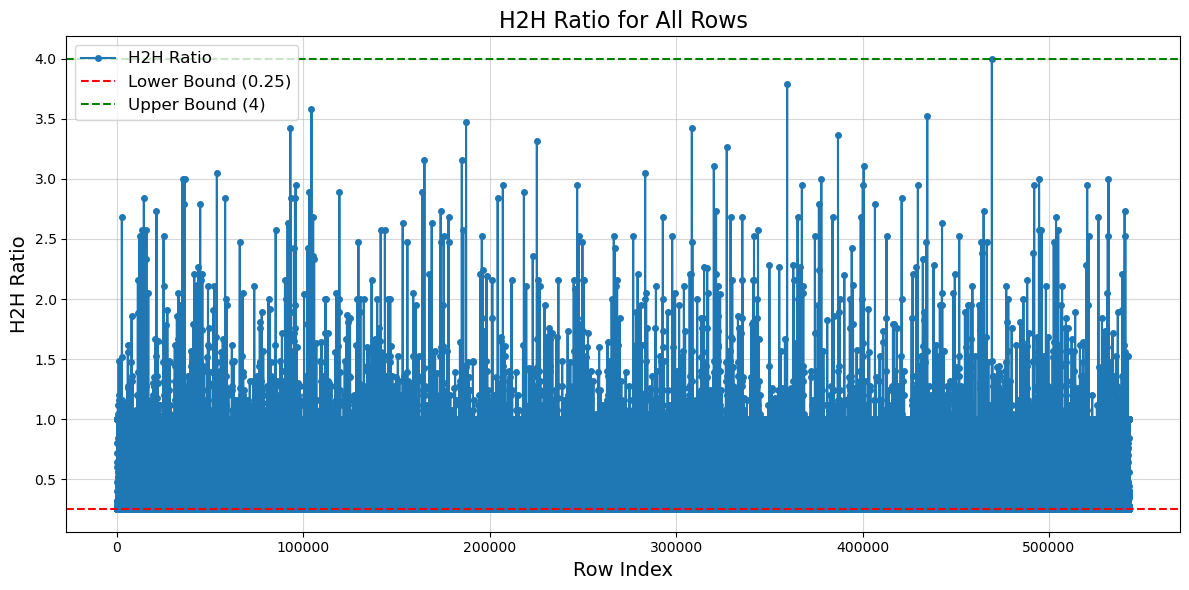

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_h2h_t20.index, df_h2h_t20['h2h_ratio'], label='H2H Ratio', marker='o', linestyle='-', markersize=4)
plt.title('H2H Ratio for All Rows', fontsize=16)
plt.xlabel('Row Index', fontsize=14)
plt.ylabel('H2H Ratio', fontsize=14)
plt.axhline(0.25, color='red', linestyle='--', label='Lower Bound (0.25)')
plt.axhline(4, color='green', linestyle='--', label='Upper Bound (4)')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

 # h2h - odi

In [67]:

# Load your dataframe
df_h2h_odi = pd.read_csv('ODI_H2H.csv', dtype={'ColumnName': str}, low_memory=False)

# Function to calculate batsman fantasy points
def calculate_batsman_fp(row):
    points = 0

    # Batting Points
    points += row['runs_scored']  # 1 point per run
    points += row.get('4s', 0)  # 1 point per boundary
    points += row.get('6s', 0) * 2  # 2 points per six

    # Bonus for milestones
    if row['runs_scored'] >= 100:
        points += 16
    elif row['runs_scored'] >= 50:
        points += 8
    elif row['runs_scored'] >= 30 and row['match_type'] == 'T20':
        points += 4

    # Calculate duck penalty
    if row['runs_scored'] == 0 and row.get('out', '') == 'out':
        # if row['match_type'] in ['ODI', 'T20']:
        points -= 2  # Duck penalty for ODI and T20
        # elif row['match_type'] == 'Test':
        #     points -= 4  # Duck penalty for Test matches

    # Strike Rate Bonus/Penalty
    if row['balls_faced'] >= 10:
        strike_rate = (row['runs_scored'] / row['balls_faced']) * 100
        if strike_rate > 140:
            points += 6
        elif 120 < strike_rate <= 140:
            points += 4
        elif 100 < strike_rate <= 120:
            points += 2
        elif 40 <= strike_rate < 50:
            points -= 2
        elif 30 <= strike_rate < 40:
            points -= 4
        elif strike_rate < 30:
            points -= 6
    return points

# Function to calculate bowler fantasy points
def calculate_bowler_fp(row):
    points = 0

    # Bowling Points
    points += row['wickets'] * 25  # 25 points per wicket

    # Bonus for wicket hauls
    if row['wickets'] >= 5:
        points += 16
    elif row['wickets'] == 4:
        points += 8
    elif row['wickets'] == 3:
        points += 4

    # Economy Rate Bonus/Penalty
    if row['balls_bowled'] / 6 >= 2:
        economy_rate = row['runs_conceded'] / (row['balls_bowled'] / 6)
        if economy_rate < 2.5:
            points += 6
        elif 2.5 <= economy_rate < 3.5:
            points += 4
        elif 3.5 <= economy_rate < 4.5:
            points += 2
        elif 7 <= economy_rate < 8:
            points -= 2
        elif 8 <= economy_rate < 9:
            points -= 4
        elif economy_rate >= 9:
            points -= 6

    return points

# Calculate batsman and bowler fantasy points for each row
df_h2h_odi['batsman_fp'] = df_h2h_odi.apply(calculate_batsman_fp, axis=1)
df_h2h_odi['bowler_fp'] = df_h2h_odi.apply(calculate_bowler_fp, axis=1)

# Calculate H2H ratio
if 'h2h_ratio' not in df_h2h_odi.columns:
    df_h2h_odi['h2h_ratio'] = df_h2h_odi['batsman_fp'] / df_h2h_odi['bowler_fp']

# Update h2h_ratio to 1 if the bowler has not taken any wickets
df_h2h_odi.loc[df_h2h_odi['wickets'] == 0, 'h2h_ratio'] = 1

# Ensure h2h_ratio is bounded between 0.25 and 4
df_h2h_odi['h2h_ratio'] = df_h2h_odi['h2h_ratio'].clip(lower=0.25, upper=4)
# Display the filtered dataframe

df_h2h_odi.head()

# Save to a new CSV if needed
# filtered_df.to_csv('filtered_h2h_stats.csv', index=False)


,match_id,batsman_id,batsman_name,batsman_team,bowler_id,bowler_name,bowler_team,runs_scored,balls_faced,runs_conceded,...,6s,wickets,gender,venue,date,match_type,wicket_type,batsman_fp,bowler_fp,h2h_ratio
0,1000887,dcce6f09,DA Warner,Australia,e174dadd,Mohammad Amir,Pakistan,2,12,3,...,0,1,male,"Brisbane Cricket Ground, Woolloongabba",2017-01-13,ODI,bowled,-4,31,0.25
1,1000887,12b610c2,TM Head,Australia,9ab63e7b,Mohammad Hafeez,Pakistan,4,11,4,...,0,0,male,"Brisbane Cricket Ground, Woolloongabba",2017-01-13,ODI,NaN,0,0,1.00
2,1000887,dcce6f09,DA Warner,Australia,9ab63e7b,Mohammad Hafeez,Pakistan,5,6,5,...,0,0,male,"Brisbane Cricket Ground, Woolloongabba",2017-01-13,ODI,NaN,6,0,1.00
3,1000887,12b610c2,TM Head,Australia,e174dadd,Mohammad Amir,Pakistan,4,8,4,...,0,0,male,"Brisbane Cricket Ground, Woolloongabba",2017-01-13,ODI,NaN,4,0,1.00
4,1000887,30a45b23,SPD Smith,Australia,e174dadd,Mohammad Amir,Pakistan,0,1,0,...,0,1,male,"Brisbane Cricket Ground, Woolloongabba",2017-01-13,ODI,caught,0,25,0.25


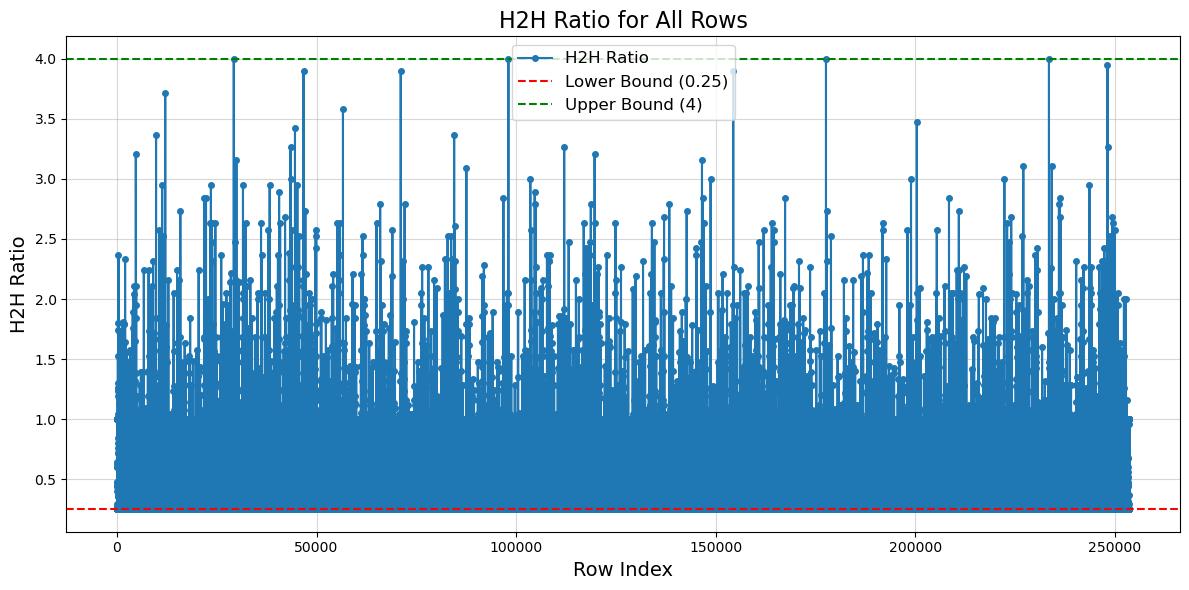

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_h2h_odi.index, df_h2h_odi['h2h_ratio'], label='H2H Ratio', marker='o', linestyle='-', markersize=4)
plt.title('H2H Ratio for All Rows', fontsize=16)
plt.xlabel('Row Index', fontsize=14)
plt.ylabel('H2H Ratio', fontsize=14)
plt.axhline(0.25, color='red', linestyle='--', label='Lower Bound (0.25)')
plt.axhline(4, color='green', linestyle='--', label='Upper Bound (4)')
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# optimised career 

In [71]:
import pandas as pd

# Load the dataset
df = pd.read_csv('match_data3.csv')

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date to ensure correct accumulation
df = df.sort_values(by='date')

# Initialize a hashmap (dictionary) to store cumulative statistics for each player
player_stats = {}

# Initialize columns for career statistics
df['batsman_100s'] = 0
df['batsman_50s'] = 0
df['batsman_average_runs_per_match'] = 0
df['batsman_strike_rate'] = 0
df['batsman_total_runs'] = 0
df['bowler_average'] = 0
df['bowler_economy_rate'] = 0
df['bowler_wickets'] = 0
df['fielder_total_catches'] = 0
df['fielder_total_runouts'] = 0

# Counter for progress tracking
processed_rows = 0

# Process each row in the dataframe
for index, row in df.iterrows():
    player_id = row['player_id']
    
    # If the player is not in the hashmap, initialize their stats
    if player_id not in player_stats:
        player_stats[player_id] = {
            "total_runs": 0,
            "total_balls": 0,
            "matches_for_average": 0,
            "hundreds": 0,
            "fifties": 0,
            "total_runs_conceded": 0,
            "total_balls_bowled": 0,
            "total_wickets": 0,
            "total_catches": 0,
            "total_runouts": 0,
        }

    # Update cumulative stats for the player
    stats = player_stats[player_id]
    stats['total_runs'] += row['runs_scored']
    stats['total_balls'] += row['balls_faced']
    stats['matches_for_average'] += 1 if row['out'] == 'out' else 0
    stats['hundreds'] += 1 if row['runs_scored'] >= 100 else 0
    stats['fifties'] += 1 if row['runs_scored'] >= 50 else 0
    stats['total_runs_conceded'] += row['runs_conceded']
    stats['total_balls_bowled'] += row['balls_bowled']
    stats['total_wickets'] += row['wickets']
    stats['total_catches'] += row['no_of_catches']
    stats['total_runouts'] += row['runouts']

    # Calculate career statistics for the current match
    df.at[index, 'batsman_100s'] = stats['hundreds']
    df.at[index, 'batsman_50s'] = stats['fifties']
    df.at[index, 'batsman_average_runs_per_match'] = stats['total_runs'] / stats['matches_for_average'] if stats['matches_for_average'] > 0 else 0
    df.at[index, 'batsman_strike_rate'] = (stats['total_runs'] / stats['total_balls'] * 100) if stats['total_balls'] > 0 else 0
    df.at[index, 'batsman_total_runs'] = stats['total_runs']
    df.at[index, 'bowler_economy_rate'] = (stats['total_runs_conceded'] / (stats['total_balls_bowled'] / 6)) if stats['total_balls_bowled'] > 0 else 0
    df.at[index, 'bowler_average'] = (stats['total_runs_conceded'] / stats['total_wickets']) if stats['total_wickets'] > 0 else 0
    df.at[index, 'bowler_wickets'] = stats['total_wickets']
    df.at[index, 'fielder_total_catches'] = stats['total_catches']
    df.at[index, 'fielder_total_runouts'] = stats['total_runouts']

    # Increment the processed rows counter
    processed_rows += 1

    # Print progress every 10,000 rows
    if processed_rows % 10000 == 0:
        print(f"Processed {processed_rows} rows...")

# Save the updated DataFrame to a new CSV file
df.to_csv('optimised_op.csv', index=False)

print("Career statistics added to the DataFrame with optimized performance!")


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\67737898.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('match_data3.csv')
C:\Users\HP\AppData\Local\Temp\ipykernel_24584\67737898.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7857142857142858' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'bowler_economy_rate'] = (stats['total_runs_conceded'] / (stats['total_balls_bowled'] / 6)) if stats['total_balls_bowled'] > 0 else 0
C:\Users\HP\AppData\Local\Temp\ipykernel_24584\67737898.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'bowler_average'] = (stats['total_runs_conceded'] / 

Processed 10000 rows...
Processed 20000 rows...
Processed 30000 rows...
Processed 40000 rows...
Processed 50000 rows...
Processed 60000 rows...
Processed 70000 rows...
Processed 80000 rows...
Processed 90000 rows...
Processed 100000 rows...
Processed 110000 rows...
Processed 120000 rows...
Processed 130000 rows...
Processed 140000 rows...
Processed 150000 rows...
Processed 160000 rows...
Processed 170000 rows...
Processed 180000 rows...
Processed 190000 rows...
Processed 200000 rows...
Processed 210000 rows...
Processed 220000 rows...
Processed 230000 rows...
Processed 240000 rows...
Processed 250000 rows...
Processed 260000 rows...
Processed 270000 rows...
Processed 280000 rows...
Processed 290000 rows...
Processed 300000 rows...
Processed 310000 rows...
Processed 320000 rows...
Processed 330000 rows...
Processed 340000 rows...
Processed 350000 rows...
Processed 360000 rows...
Processed 370000 rows...
Processed 380000 rows...
Processed 390000 rows...
Processed 400000 rows...
Processed

In [73]:
df = pd.read_csv('optimised_op.csv')


C:\Users\HP\AppData\Local\Temp\ipykernel_24584\1954904645.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('optimised_op.csv')


AttributeError: 'DataFrame' object has no attribute 'taik'

In [74]:
df.tail()

,match_id,player_id,player_name,runs_scored,balls_faced,no_of_fours,no_of_sixes,no_of_catches,runouts,balls_bowled,...,batsman_100s,batsman_50s,batsman_average_runs_per_match,batsman_strike_rate,batsman_total_runs,bowler_average,bowler_economy_rate,bowler_wickets,fielder_total_catches,fielder_total_runouts
464509,1451903,a77472dc,G Stewart,8,23,0,0,0,0,60,...,1,16,25.076923,87.841024,2608,34.419890,4.648097,181,26,3
464510,1451903,87e33d07,F Nsubuga,3,3,0,0,0,0,60,...,0,0,9.675000,61.624204,387,19.354167,4.018745,96,21,6
464511,1456868,4d7c5b56,IK Gamantika,0,0,0,0,0,0,12,...,0,0,15.909091,84.677419,525,19.107143,5.868373,28,21,5
464512,1454819,d7bfcc0b,Mehran Khan,4,4,0,0,0,0,18,...,0,0,10.969697,100.555556,362,23.681818,6.931264,22,10,3
464513,1449303,85b3fab2,T Stubbs,12,12,2,0,0,0,0,...,2,17,35.000000,122.355106,2660,22.222222,8.510638,9,67,2


In [77]:
# Filter the dataframe for entries with player_name == "V Kohli"
kohli_data = pd.DataFrame(df[df['player_name'] == "V Kohli"])  # Explicitly ensuring it's a DataFrame

# Display the filtered data
print(kohli_data)

# Optionally, save the DataFrame to a CSV file
kohli_data.to_csv('V_Kohli_Data.csv', index=False)
pd 

       match_id player_id player_name  runs_scored  balls_faced  no_of_fours  \
20940    335982  ba607b88     V Kohli            1            5            0   
21097    335985  ba607b88     V Kohli           23           14            3   
21281    335992  ba607b88     V Kohli           13           14            0   
21388    335996  ba607b88     V Kohli           12            7            2   
21439    335998  ba607b88     V Kohli            1            1            0   
...         ...       ...         ...          ...          ...          ...   
455870  1439891  ba607b88     V Kohli           23           43            2   
457478  1439892  ba607b88     V Kohli           76           72            8   
460410  1439896  ba607b88     V Kohli           70          111            8   
461702  1439897  ba607b88     V Kohli           18           49            2   
462727  1439898  ba607b88     V Kohli            5           13            1   

        no_of_sixes  no_of_catches  run

<module 'pandas' from 'C:\\Users\\HP\\Desktop\\MLfromUdemy\\env\\Lib\\site-packages\\pandas\\__init__.py'>

In [79]:
king_data = pd.read_csv('V_Kohli_Data.csv')
king_data.tail()

,match_id,player_id,player_name,runs_scored,balls_faced,no_of_fours,no_of_sixes,no_of_catches,runouts,balls_bowled,...,batsman_100s,batsman_50s,batsman_average_runs_per_match,batsman_strike_rate,batsman_total_runs,bowler_average,bowler_economy_rate,bowler_wickets,fielder_total_catches,fielder_total_runouts
774,1439891,ba607b88,V Kohli,23,43,2,0,2,0,0,...,93,282,54.291536,87.249370,34638,95.428571,6.464516,14,426,42
775,1439892,ba607b88,V Kohli,76,72,8,1,0,0,0,...,93,283,54.325509,87.282510,34714,95.428571,6.464516,14,426,42
776,1439896,ba607b88,V Kohli,70,111,8,1,0,0,0,...,93,284,54.350000,87.215104,34784,95.428571,6.464516,14,426,42
777,1439897,ba607b88,V Kohli,18,49,2,0,0,0,0,...,93,284,54.293292,87.153160,34802,95.428571,6.464516,14,426,42
778,1439898,ba607b88,V Kohli,5,13,1,0,1,0,0,...,93,284,54.216511,87.137314,34807,95.428571,6.464516,14,427,42
